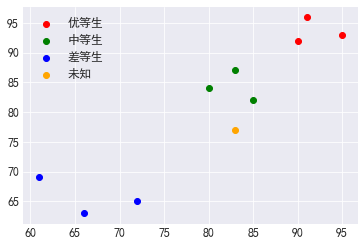

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-darkgrid")
plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.size"] = 12

good = np.array([[95, 93], [90, 92], [91, 96]])
medium = np.array([[85, 82], [83, 87], [80, 84]])
bad = np.array([[61, 69], [66, 63], [72, 65]])
unknown = np.array([[83, 77]])


plt.scatter(good[:, 0], good[:, 1], color="r", label="优等生")
plt.scatter(medium[:, 0], medium[:, 1], color="g", label="中等生")
plt.scatter(bad[:, 0], bad[:, 1], color="b", label="差等生")
plt.scatter(unknown[:, 0], unknown[:, 1], color="orange", label="未知")
plt.legend(loc="best")
plt.show()

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

iris = load_iris()
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# n_neighbors：邻居的数量。
# weights：权重计算方式。可选值为uniform与distance。
#    uniform：所有样本统一权重。
#    distance：样本权重与距离成反比。
knn = KNeighborsClassifier(n_neighbors=3, weights="uniform")
knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.78      0.44      0.56        16
           2       0.44      0.78      0.56         9

    accuracy                           0.71        38
   macro avg       0.74      0.74      0.71        38
weighted avg       0.77      0.71      0.71        38



In [18]:
from matplotlib.colors import ListedColormap


def plot_decision_boundary(model, X, y):
    color = ["r", "g", "b"]
    marker = ["o", "v", "x"]
    class_label = np.unique(y)
    cmap = ListedColormap(color[:len(class_label)])
    x1_min, x2_min = np.min(X, axis=0)
    x1_max, x2_max = np.max(X, axis=0)
    x1 = np.arange(x1_min - 1, x1_max + 1, 0.02)
    x2 = np.arange(x2_min - 1, x2_max + 1, 0.02)
    X1, X2 = np.meshgrid(x1, x2)
    Z = model.predict(np.c_[X1.ravel(), X2.ravel()])
    Z = Z.reshape(X1.shape)
    plt.contourf(X1, X2, Z, cmap=cmap, alpha=0.5)
    for i, class_ in enumerate(class_label):
        plt.scatter(x=X[y == class_, 0],
                    y=X[y == class_, 1],
                    c=cmap.colors[i],
                    label=class_,
                    marker=marker[i])
    plt.legend()
#     plt.show()

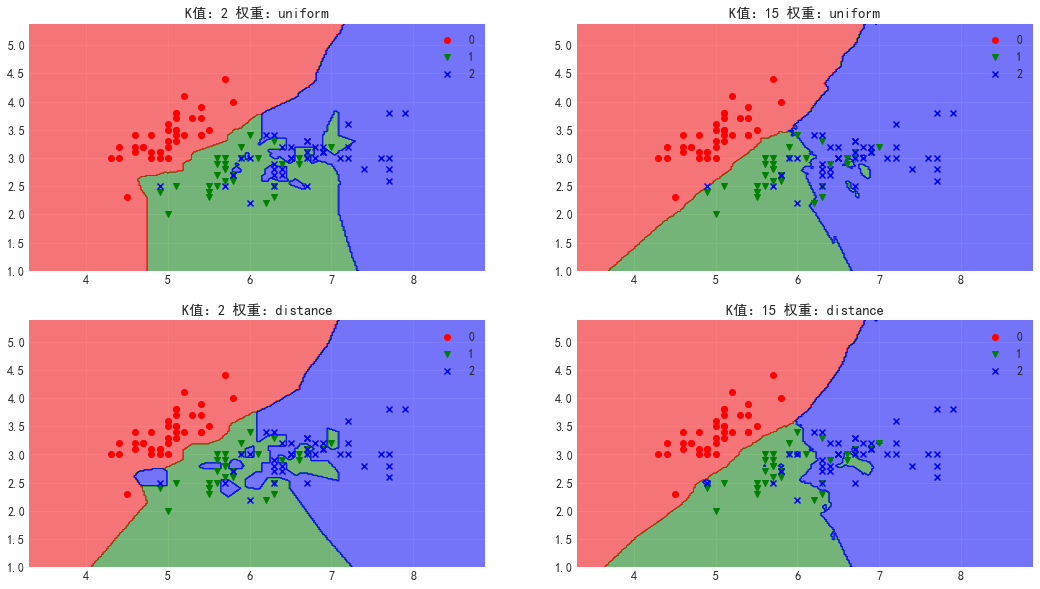

In [19]:
from itertools import product
weights = ['uniform', 'distance']
ks = [2, 15]

plt.figure(figsize=(18, 10))
# 计算weights与ks的笛卡尔积组合。这样就可以使用单层循环取代嵌套循环，
# 增加代码可读性与可理解性。
for i, (w, k) in enumerate(product(weights, ks), start=1):
    plt.subplot(2, 2, i)
    plt.title(f"K值：{k} 权重：{w}")
    knn = KNeighborsClassifier(n_neighbors=k, weights=w)
    knn.fit(X, y)
    plot_decision_boundary(knn, X_train, y_train)

In [21]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
# 定义需要尝试的超参数组合。
grid = {"n_neighbors": range(1, 11, 1), "weights": ['uniform', 'distance']}
# estimator：评估器，即对哪个模型调整超参数。
# param_grid：需要检验的超参数组合。从这些组合中，寻找效果最好的超参数组合。
# scoring：模型评估标准。
# n_jobs：并发数量。
# cv：交叉验证折数。
# verbose：输出冗余信息，值越大，输出的信息越多。
gs = GridSearchCV(estimator=knn,
                  param_grid=grid,
                  scoring="accuracy",
                  n_jobs=-1,
                  cv=5,
                  verbose=10,
                  iid=True)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0229s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of 100 | elapsed:    0.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  52 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid=True, n_jobs=-1,
             param_grid={'n_neighbors': range(1, 11),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=10)

In [22]:
# multimetric_grid_search

In [23]:
# 最好的分值。
print(gs.best_score_)
# 最好的超参数组合。
print(gs.best_params_)
# 使用最好的超参数训练好的模型。
print(gs.best_estimator_)

0.8035714285714286
{'n_neighbors': 7, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')


In [24]:
estimator = gs.best_estimator_
y_hat = estimator.predict(X_test)
print(classification_report(y_test, y_hat))
print(estimator.score(X_test,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.80      0.50      0.62        16
           2       0.47      0.78      0.58         9

    accuracy                           0.74        38
   macro avg       0.76      0.76      0.73        38
weighted avg       0.79      0.74      0.74        38

0.7368421052631579


In [25]:
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=0)
knn = KNeighborsRegressor(n_neighbors=3, weights="uniform")
knn.fit(X_train, y_train)
print("KNN算法R^2值：", knn.score(X_test, y_test))
lr = LinearRegression()
lr.fit(X_train, y_train)
print("线性回归算法R^2值：", lr.score(X_test, y_test))

KNN算法R^2值： 0.509785478689029
线性回归算法R^2值： 0.6354638433202129


In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = [StandardScaler(), MinMaxScaler()]
desc = ["均值标准差标准化", "最小最大值标准化"]
for s, d in zip(scaler, desc):
    X_train_scale = s.fit_transform(X_train)
    X_test_scale = s.transform(X_test)
    knn = KNeighborsRegressor(n_neighbors=3, weights="uniform")
    knn.fit(X_train_scale, y_train)
    print(d, knn.score(X_test_scale, y_test))

均值标准差标准化 0.6248800677762865
最小最大值标准化 0.6177749492293981


In [29]:
StandardScaler().fit_transform(X_train)

array([[-0.3906002 ,  0.42637011, -0.74491444, ...,  0.27878885,
         0.34049624,  0.82212111],
       [-0.40127639,  0.5525335 , -0.84901832, ...,  0.55287698,
         0.42774893, -0.46241699],
       [-0.40110543,  1.18335044, -0.66648002, ..., -0.40643148,
         0.34184377, -0.90310809],
       ...,
       [-0.3954927 , -0.49882807, -0.15309105, ..., -0.31506877,
         0.40091059, -0.31227617],
       [-0.38599992, -0.49882807, -0.59517599, ..., -0.26938741,
         0.38103449,  0.86938766],
       [-0.39692832, -0.49882807, -1.003035  , ..., -0.86324503,
         0.42774893,  0.29801844]])

In [36]:
from sklearn.pipeline import Pipeline

X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=0)
# 定义流水线的步骤。类型为一个列表，列表中的每个元素是元组类型，
# 格式为：[(步骤名1，评估器1), (步骤名2， 评估器2)，……， (步骤名n, 评估器n)
steps = [("scaler", StandardScaler()), ("knn", KNeighborsRegressor())]
p = Pipeline(steps)
# 设置流水线的参数。所有可用的参数，可以通过get_params获取。
p.set_params(knn__n_neighbors=3, knn__weights="uniform")
p.fit(X_train, y_train)
print(p.score(X_test, y_test))

0.6248800677762865
